In [2]:
print("Установка библиотек для обработки данных и визуализации...")
%pip install numpy pandas scikit-learn matplotlib seaborn -q

print("\nУстановка библиотек для NLP...")
%pip install nltk pymorphy2 pymorphy3 -q

print("\nУстановка TensorFlow/Keras для нейронных сетей...")
%pip install tensorflow keras -q

print("\nУстановка дополнительных ML библиотек...")
%pip install xgboost lightgbm catboost -q

print("\nУстановка библиотек для работы с текстом...")
%pip install gensim -q

# Загрузка данных NLTK
import nltk
print("\nЗагрузка данных NLTK...")
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-ru')  # Для русского языка

# Игнорирование предупреждений
import warnings
warnings.filterwarnings('ignore')

# Основные библиотеки
import re
import random
import numpy as np
import pandas as pd

# Визуализация
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import matplotlib.text as text
import matplotlib.cm as cm
import seaborn as sns

# Настройки отображения
%matplotlib inline
sns.set()
pd.options.display.width = 0
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 11)

# NLP библиотеки
import pymorphy2
import pymorphy3
from nltk.corpus import stopwords
from string import punctuation

# Scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

# Дополнительные ML библиотеки
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Нейронные сети
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Embedding, LSTM, GRU, Bidirectional, SpatialDropout1D, GlobalMaxPool1D
from keras.optimizers import Adam, RMSprop, SGD, Nadam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
from keras.utils import to_categorical

# Другие утилиты
import itertools
import warnings
warnings.filterwarnings('ignore')

# Google Colab
from google.colab import drive
drive.mount('/content/gdrive')

Установка библиотек для обработки данных и визуализации...

Установка библиотек для NLP...

Установка TensorFlow/Keras для нейронных сетей...

Установка дополнительных ML библиотек...

Установка библиотек для работы с текстом...

Загрузка данных NLTK...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Error loading omw-ru: Package 'omw-ru' not found in index


Mounted at /content/gdrive


In [3]:
# 2
file_path = '/content/gdrive/My Drive/Colab Notebooks/mails.xlsx'
!pwd
!ls -la
df = pd.read_excel(file_path)
print(df['class'].unique())
df['TYPE_HOTLINE'].unique()


/content
total 20
drwxr-xr-x 1 root root 4096 Dec  3 10:51 .
drwxr-xr-x 1 root root 4096 Dec  3 10:44 ..
drwxr-xr-x 4 root root 4096 Nov 20 14:30 .config
drwx------ 5 root root 4096 Dec  3 10:51 gdrive
drwxr-xr-x 1 root root 4096 Nov 20 14:30 sample_data
[1 6 5 2 3 4 8 7]


array([2, 1, 3])

In [4]:
# 3
# # Меняем наименование столбца только для удобства
df.rename(columns={'CLASS_': 'lbl'}, inplace=True)
# Для удобства добавляем два столбца с наименованиями классов и каналов поствупления обращений.
cls_dic = {1:['Условия подачи','Условия подачи документов, сроки, документы, места, льготы'],
           2:['Проходной и допустимый балл','Минимальный проходной балл и Минимальный балл для подачи заявления'],
           3:['Достижения','Индивидуальные достижения.'],
           4:['Общежития','Общежития'],
           5:['Вступительные испытания','Вступительные испытания, экзамены, кто может поступать и сдавать экзамены'],
           6:['Перевод','Перевод с направления на направление'],
           7:['Аспирантура','Вопросы по аспирантуре'],
           8:['Регистрация','Регистрация в электронных системах'],
           }
hlt_dic = {1:'ONLINE приёмная',
           2:'Очная приемная',
           3:'Приёмная аспирантуры'
           }

df['cls_name'] = df['class'].map(lambda x: cls_dic[x][0])
df['hlt_name'] = df.TYPE_HOTLINE.map(lambda x: hlt_dic[x])
df.head()

,CONTENT,TYPE_HOTLINE,class,cls_name,hlt_name
0,Здравствуйте! Поступила в ваш институт на бюдж...,2,1,Условия подачи,Очная приемная
1,Здравствуйте! Я прошла конкурс по трем дисципл...,2,6,Перевод,Очная приемная
2,Здравствуйте! Скажите пожалуйста могу ли я под...,2,1,Условия подачи,Очная приемная
3,Здравствуйте! Где взять и куда подать заявлени...,2,1,Условия подачи,Очная приемная
4,Здравствуйте! Есть два высших образования (пла...,2,1,Условия подачи,Очная приемная


In [5]:
# 4
cls_list = []
for i in range(1,len(cls_dic)+1):
  cls_list.append(cls_dic[i][0])

In [6]:
# 5
df.shape

(588, 5)

### Анализ, визуализация и сбалансированность датасета

cls_name
Аспирантура                      5
Вступительные испытания        155
Достижения                      29
Общежития                       28
Перевод                         42
Проходной и допустимый балл     24
Регистрация                     16
Условия подачи                 289
Name: cls_name, dtype: int64


<Axes: ylabel='cls_name'>

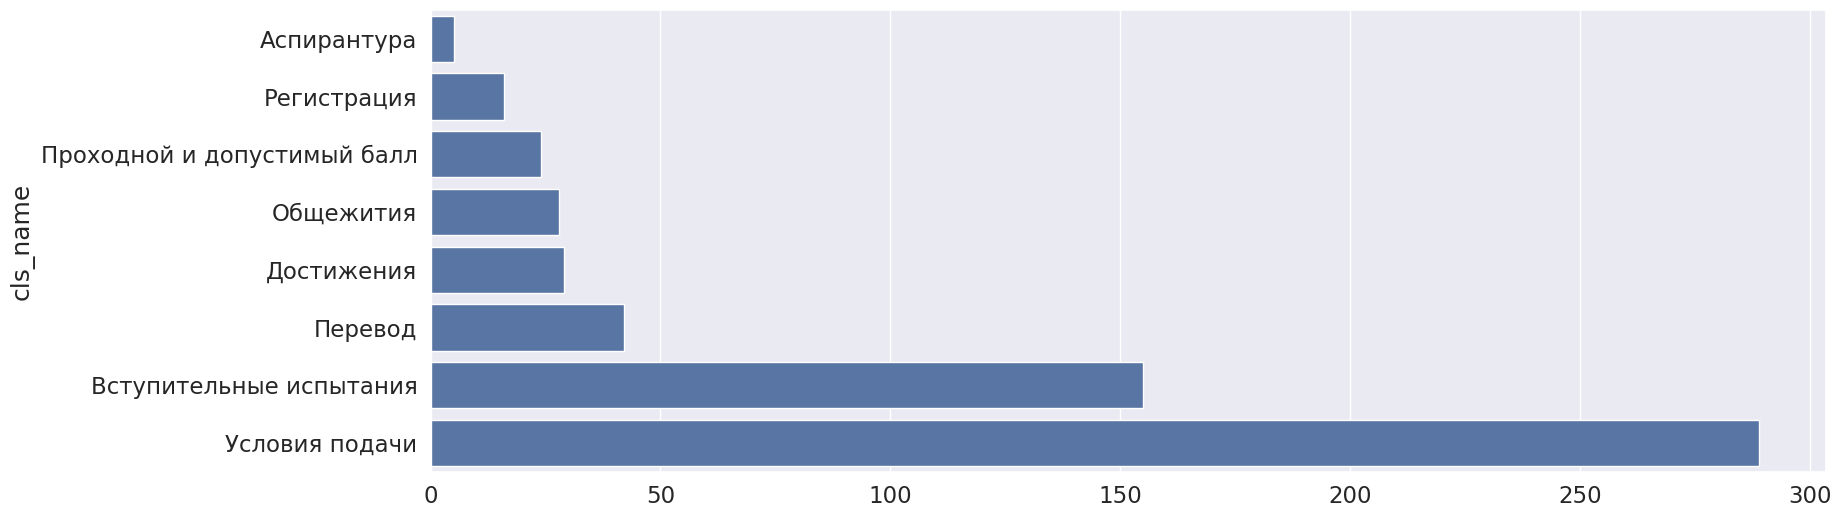

In [7]:
# 6
g = df.groupby('cls_name')['cls_name'].count().sort_values()
print(df.groupby('cls_name')['cls_name'].count())
sns.set(font_scale=1.5)
f, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x=g.values, y=g.index, orient='h')
#f.savefig('Data\\fig_1.png', bbox_inches='tight')

<Axes: ylabel='TYPE_HOTLINE'>

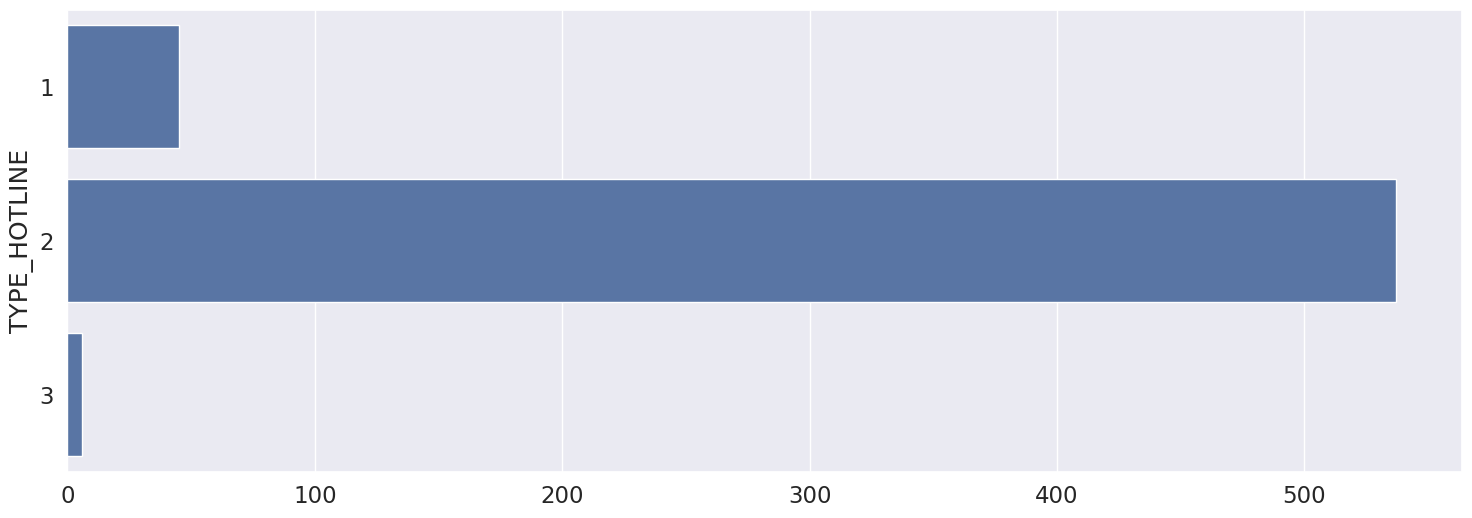

In [8]:
# 7
g = df.groupby('TYPE_HOTLINE')['TYPE_HOTLINE'].count().sort_values()
sns.set(font_scale=1.5)
f, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x=g.values, y=g.index, orient='h')

# Задача 1. Подготовка данных
Предобработка текста писем: удаление из текста лишней информации, которая не нужна для получения основной мысли сообщения и классификации его.

In [9]:
# 8
import re
import nltk
from nltk.corpus import stopwords
from string import punctuation

# Загрузка стоп-слов
nltk.download('stopwords')
russian_stopwords = stopwords.words('russian')

# Добавляем специфические стоп-слова для нашей задачи
custom_stopwords = ['фамилия', 'имя', 'отчество', 'уважаемый', 'здравствуйте', 'спасибо']
russian_stopwords.extend(custom_stopwords)

def robust_text_processing(text):
    """
    Надежная обработка текста без внешних морфологических анализаторов
    """
    if not isinstance(text, str):
        return ""

    # Приведение к нижнему регистру
    text = text.lower()

    # Удаление email, URL, телефонов
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\+7\s?\(?\d{3}\)?\s?\d{3}[-]?\d{2}[-]?\d{2}', '', text)

    # Удаление чисел
    text = re.sub(r'\d+', '', text)

    # Удаление пунктуации
    text = re.sub(f'[{re.escape(punctuation)}]', ' ', text)

    # Нормализация пробелов
    text = re.sub(r'\s+', ' ', text).strip()

    # Токенизация и фильтрация
    words = text.split()
    filtered_words = []

    for word in words:
        # Убираем короткие слова и стоп-слова
        if len(word) > 2 and word not in russian_stopwords:
            filtered_words.append(word)

    return ' '.join(filtered_words)

# Применяем обработку
df['text_processed'] = df['CONTENT'].apply(robust_text_processing)

print("Обработка завершена успешно!")
print(f"Размер датасета: {len(df)}")
print("\nПример исходного текста:")
print(df['CONTENT'].iloc[0][:200] + "..." if len(df) > 0 else "Нет данных")
print("\nПример обработанного текста:")
print(df['text_processed'].iloc[0] if len(df) > 0 else "Нет данных")

Обработка завершена успешно!
Размер датасета: 588

Пример исходного текста:
Здравствуйте! Поступила в ваш институт на бюджет Педиатрического факультета. Написала отказ от зачисления, как удостоверится в том, что меня отчислили? С уважнием, Ксения....

Пример обработанного текста:
поступила ваш институт бюджет педиатрического факультета написала отказ зачисления удостоверится отчислили уважнием ксения


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Приведение слов в нормальную форму

In [10]:
# 9
def morphan(word, morph):
    '''
    Приведение слов в нормальную форму, удаление числительных и ФИО.
    '''
    word = robust_text_processing(word).strip()
    p = morph.parse(word)[0]

    word_new = word
    if (not 'Surn' in p.tag) and (not 'Name' in p.tag) and (not 'Patr' in p.tag) and ('NOUN' in p.tag):
        #существительное не ФИО
        word_new = p.normal_form
    elif 'Surn' in p.tag:
        word_new = 'ФАМИЛИЯ'
    elif 'Name' in p.tag:
        word_new = 'ИМЯ'
    elif 'Patr' in p.tag:
        word_new = 'ОТЧЕСТВО'


    elif ('INFN' in p.tag) or ('VERB' in p.tag): #глагол
        word_new = p.normal_form

    elif ('ADJF' in p.tag) or ('ADJS' in p.tag) or ('COMP' in p.tag): #прилагательное
        word_new = p.normal_form


    elif ('PRTF' in p.tag) or ('PRTS' in p.tag) or ('GRND' in p.tag): #причастие, похоже на глагол
        word_new = p.normal_form

    elif ('ADVB' in p.tag) or ('NPRO' in p.tag) or ('PRED' in p.tag) or ('PREP' in p.tag) or ('CONJ' in p.tag) or ('PRCL' in p.tag) or ('INTJ' in p.tag):
        # предлоги, местоимения и пр.
        word_new = p.normal_form

    elif ('NUMR' in p.tag) or ('NUMB' in p.tag) or ('intg' in p.tag): # числительные NUMB,intg
        word_new = ''

    else:
        word_new = word
    return word_new

def normtext(txt, morph):
    '''
    Возвращает текст из слов в нормальной форме
    '''
    return str(' '.join([morphan(x, morph) for x in txt.split()]))


In [12]:
# 10
import pymorphy3
morph = pymorphy3.MorphAnalyzer()

In [13]:
# 11
print(df.columns.tolist())
df['text_processed'] = df['CONTENT'].map(lambda x: normtext(x, morph))

['CONTENT', 'TYPE_HOTLINE', 'class', 'cls_name', 'hlt_name', 'text_processed']


In [14]:
# 12
# Сохраняем обработанные данные
gc_path = r"/content/gdrive/My Drive/Colab Notebooks/"
df.to_excel(gc_path + 'df_prep.xlsx', index=False)

# Задача 2. ML - Классификация
Основная задача (обязательная для решения). Разработать программу для классификации обращений (писем).

In [15]:
# 13
# Т.к. вопрорсов по аспирантуре мало, и в них в основном встречается подстрока 'аспирант', то можно записи проклассифицировать по наличию этой подстроки

def find_aspirant(txt):
    '''
    Возвращает True если в тексте есть слово, начинающееся на 'аспирант'
    '''
    return 'аспирант' in [x[:8] for x in txt.split()]

#### Подбор параметра

Fitting 3 folds for each of 2 candidates, totalling 6 fits

✅ Лучшая точность на тесте: 0.8418
✅ Лучшие параметры: {'C': 10.0}

ОТЧЕТ О ПОДБОРЕ ПАРАМЕТРОВ ДЛЯ LOGISTIC REGRESSION

📊 Результаты GridSearchCV:
Лучший score (CV): 0.7908
Лучшие параметры: {'C': 10.0}
Индекс лучшей комбинации: 1

📋 Все комбинации параметров (отсортировано по rank_test_score):
     params  mean_test_score  std_test_score  rank_test_score
{'C': 10.0}         0.790754        0.013764                1
 {'C': 1.0}         0.693431        0.010323                2


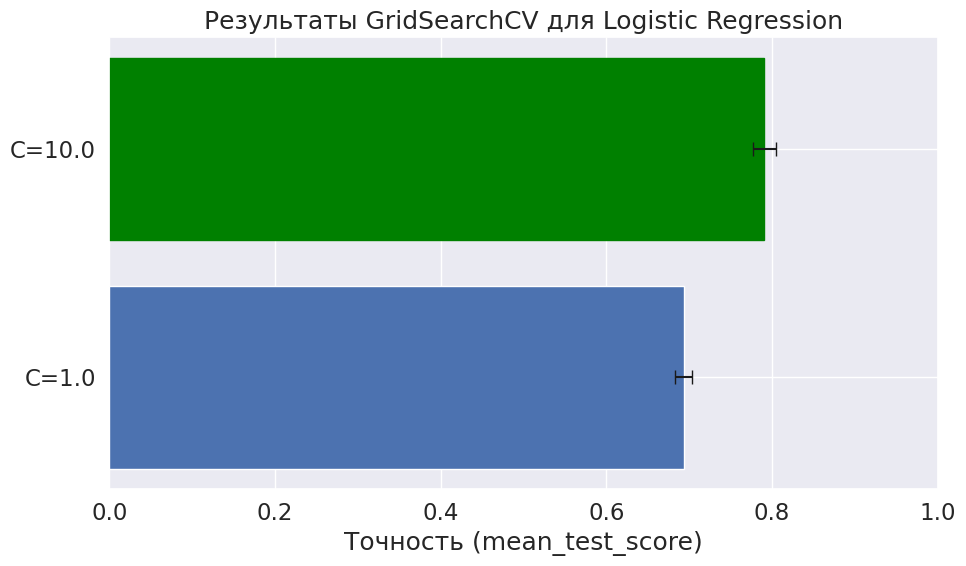


✅ Отчет сохранен: /content/gdrive/My Drive/Colab Notebooks/gridsearch_logistic_report.xlsx


In [16]:
X_train, X_test, y_train, y_test = train_test_split(df.text_processed, df['class'], random_state=42, test_size=0.3)

tfv = TfidfVectorizer()  # Функция получения векторного представления
X_train = tfv.fit_transform(X_train)
X_test = tfv.transform(X_test)

param_grid = {'C': [1., 10.0]}

grid_search = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid,
    cv=3,
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f"\n✅ Лучшая точность на тесте: {grid_search.score(X_test, y_test):.4f}")
print(f"✅ Лучшие параметры: {grid_search.best_params_}")

# === ДОБАВЛЕН ОТЧЕТ ===
print("\n" + "="*60)
print("ОТЧЕТ О ПОДБОРЕ ПАРАМЕТРОВ ДЛЯ LOGISTIC REGRESSION")
print("="*60)

# Детальный отчет по всем комбинациям параметров
results_df = pd.DataFrame(grid_search.cv_results_)

print(f"\nРезультаты GridSearchCV:")
print(f"Лучший score (CV): {grid_search.best_score_:.4f}")
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Индекс лучшей комбинации: {grid_search.best_index_}")

print("\nВсе комбинации параметров (отсортировано по rank_test_score):")
print(results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]
      .sort_values('rank_test_score')
      .to_string(index=False))

# Визуализация результатов
plt.figure(figsize=(10, 6))
combinations = [f"C={p['C']}" for p in results_df['params']]
means = results_df['mean_test_score']
stds = results_df['std_test_score']

bars = plt.barh(range(len(combinations)), means, xerr=stds, capsize=5)
plt.yticks(range(len(combinations)), combinations)
plt.xlabel('Точность (mean_test_score)')
plt.title('Результаты GridSearchCV для Logistic Regression')
plt.xlim(0, 1)

# Подсветка лучшего результата
best_idx = grid_search.best_index_
bars[best_idx].set_color('green')

plt.tight_layout()
plt.show()

# Сохранение отчета
report_df = results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']].copy()
report_df = report_df.sort_values('rank_test_score')
report_df.to_excel(gc_path + 'gridsearch_logistic_report.xlsx', index=False)
print(f"\n✅ Отчет сохранен: {gc_path}gridsearch_logistic_report.xlsx")

{'C': 10.0}

In [17]:
# 15
def classifier(X_train, y_train, C=10.):
    '''
    Возвращает обученный классификатор и векторизатор.
    '''

    tfv = TfidfVectorizer()
    X_train = tfv.fit_transform(X_train)

    clf = LogisticRegression(C=C)
    clf = clf.fit(X_train, y_train)

    return tfv, clf

def predictor(text, clf, tfv):
    '''
    text - классифицируемый текс
    clf - обученный классификатор
    tfv - обученный векторизатор

    '''
    X_test = tfv.transform([text])

    pred = clf.predict(X_test)

    return pred[0]

In [18]:
# 16
# Обучение
X_train, X_test, y_train, y_test = train_test_split(df.text_processed, df['class'], random_state=42, test_size=0.3)
tfv, clf = classifier(X_train, y_train, C=10.0)

In [19]:
# 17
# Предсказание
pred_save = []
class_save = []
pred = []
print(X_test.shape)
for nom, txt in enumerate(X_test.values):
    if find_aspirant(txt):
        # УДАЛЕНИЕ "аспирант" по подстроке
        pred_save.append(7)
        del_index = X_test.index.to_numpy()[nom]
        X_test = X_test.drop(index=[del_index])
        class_save.append(y_test[y_test.index==del_index].values[0])
        y_test = y_test.drop(index=[del_index])
    else:
        pred.append(predictor(txt, clf, tfv))
print(X_test.shape)


(177,)
(176,)


In [20]:
# 18
from sklearn import metrics
y_test_list = y_test.tolist()
y_test_list.extend(class_save)
pred_list = pred[:]
pred_list.extend(pred_save)

mtrs = metrics.classification_report([cls_dic[x][0] for x in y_test_list], [cls_dic[x][0] for x in pred_list])
print(mtrs)

                             precision    recall  f1-score   support

                Аспирантура       1.00      1.00      1.00         1
    Вступительные испытания       0.96      0.90      0.93        49
                 Достижения       0.71      0.62      0.67         8
                  Общежития       0.45      1.00      0.62         5
                    Перевод       1.00      0.17      0.29         6
Проходной и допустимый балл       1.00      0.55      0.71        11
                Регистрация       1.00      0.25      0.40         8
             Условия подачи       0.83      0.97      0.90        89

                   accuracy                           0.85       177
                  macro avg       0.87      0.68      0.69       177
               weighted avg       0.88      0.85      0.83       177



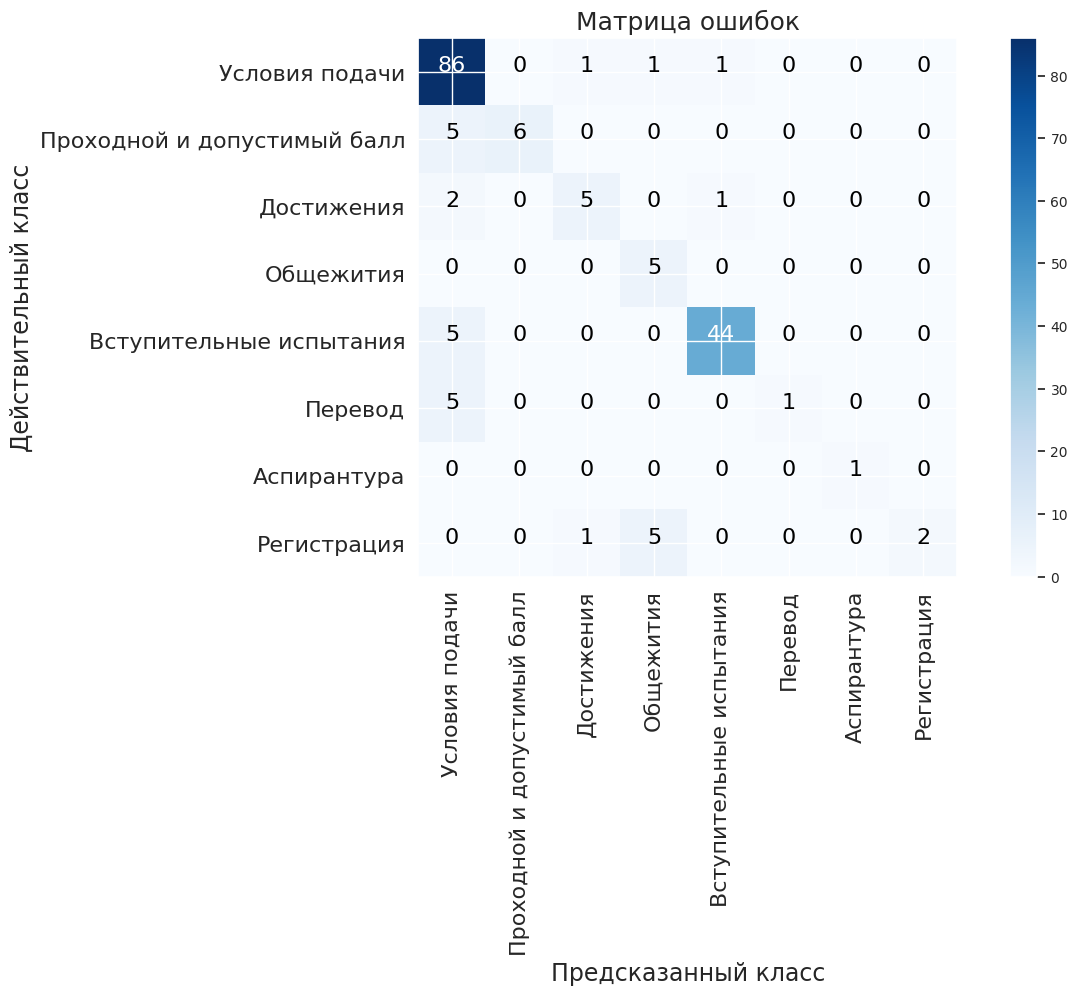

In [21]:
# 19
def plot_confusion_matrix(cm, classes, f_size=16, normalize=False, title='Матрица ошибок', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'
    """
    plt.figure(figsize=(14,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=f_size + 2)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=f_size - 6)

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=f_size)
    plt.yticks(tick_marks, classes, fontsize=f_size)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        pass
        #print("Confusion matrix, without normalization")

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize=f_size)
    plt.tight_layout()
    plt.ylabel('Действительный класс', fontsize=f_size + 1)
    plt.xlabel('Предсказанный класс', fontsize=f_size + 1)
    plt.show()

# conf_matr = confusion_matrix(y_test_list, pred_list, normalize='true')
conf_matr = confusion_matrix(y_test_list, pred_list)
plot_confusion_matrix(conf_matr, cls_list,  f_size=16)

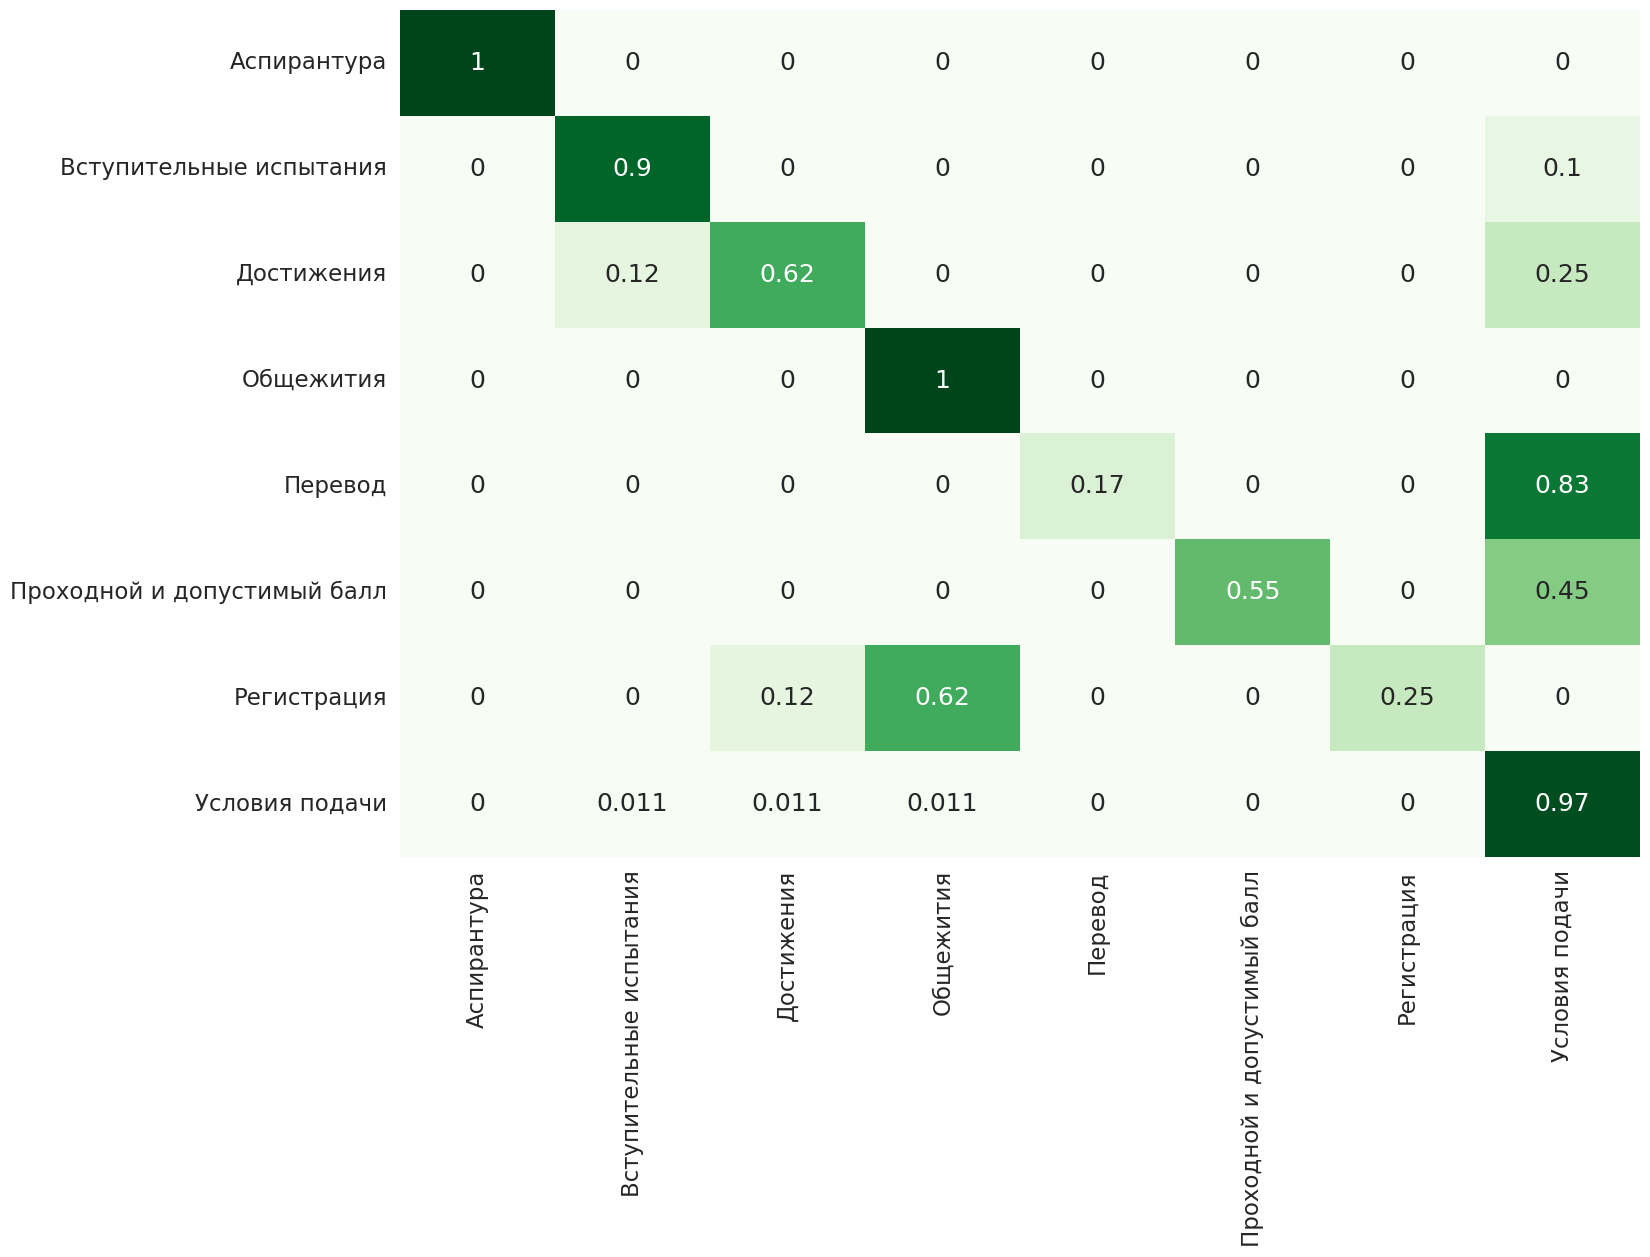

In [22]:
# 20
y_te = [cls_dic[i][0] for i in y_test_list]
y_pr = [cls_dic[i][0] for i in pred_list]
mat = confusion_matrix(y_te, y_pr, normalize='true')
mat = pd.DataFrame(mat, index=np.unique(y_te), columns=np.unique(y_pr))

f, ax = plt.subplots(figsize=(16, 11))
sns_plot = sns.heatmap(mat, annot=True, cbar=False, cmap="Greens")

TensorFlow version: 2.19.0
Размеры выборок:
Train: 423
Valid: 106
Test: 59
Максимальная длина последовательности: 62
Размерность данных после паддинга:
X_train: (423, 62)
X_valid: (106, 62)
X_test: (59, 62)
Размерность меток:
y_train: (423, 9)
y_valid: (106, 9)
y_test: (59, 9)

ВСЕ ЭКСПЕРИМЕНТЫ С НЕЙРОННЫМИ СЕТЯМИ
Всего экспериментов: 16

Запускаем все эксперименты...

Эксперимент 1/16: GRU_базовый
Точность: 0.7458, Потери: 1.1227, Эпох: 15
Новая лучшая модель!

Эксперимент 2/16: LSTM_dropout_0.2
Точность: 0.7288, Потери: 1.2042, Эпох: 15

Эксперимент 3/16: LSTM_dropout_0.5
Точность: 0.7458, Потери: 0.9600, Эпох: 15

Эксперимент 4/16: LSTM_32нейронов
Точность: 0.7119, Потери: 1.1027, Эпох: 15

Эксперимент 5/16: LSTM_128нейронов
Точность: 0.6949, Потери: 1.1734, Эпох: 15

Эксперимент 6/16: LSTM_embedding_64
Точность: 0.7288, Потери: 1.0266, Эпох: 15

Эксперимент 7/16: LSTM_embedding_256
Точность: 0.7458, Потери: 1.1834, Эпох: 11

Эксперимент 8/16: LSTM_rmsprop
Точность: 0.6780, Потери: 

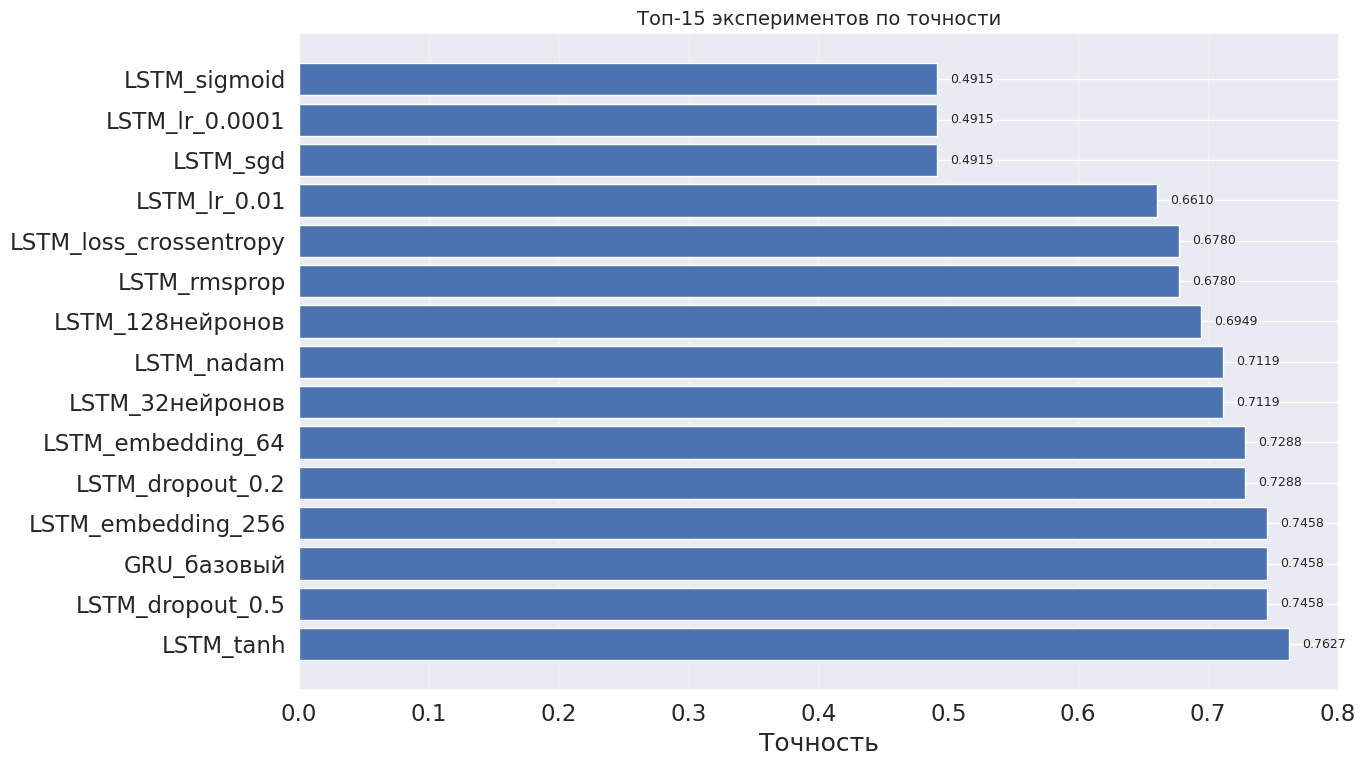

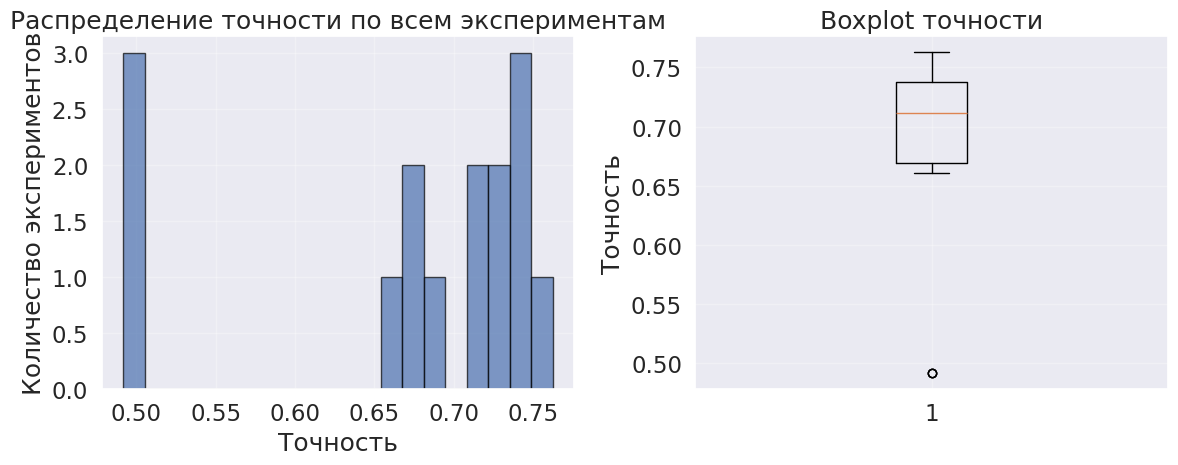

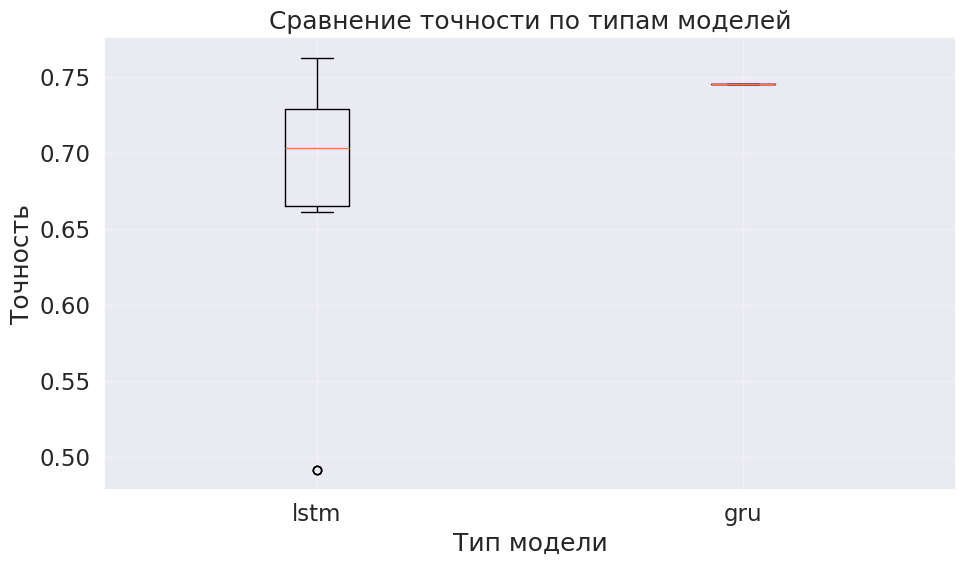


Корреляция параметров с точностью:
Точность         1.000000
dropout_rate     0.755929
embedding_dim    0.755929
learning_rate    0.269061
Эпох            -0.082659
rnn_units       -0.500000
Потери          -0.891167
dense_units1          NaN
dense_units2          NaN
Name: Точность, dtype: float64

Полный отчет сохранен: /content/gdrive/My Drive/Colab Notebooks/all_neural_experiments_report.xlsx
Лучшая модель сохранена: /content/gdrive/My Drive/Colab Notebooks/best_neural_model.h5
ВСЕ ЭКСПЕРИМЕНТЫ ЗАВЕРШЕНЫ И ПРОАНАЛИЗИРОВАНЫ!


In [29]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Embedding, LSTM, GRU, Bidirectional
from keras.optimizers import Adam, RMSprop, SGD, Nadam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ========== ПОДГОТОВКА ДАННЫХ ДЛЯ НЕЙРОННЫХ СЕТЕЙ ==========

# Используем обработанные тексты
texts = df['text_processed'].values
labels = df['class'].values

# Разделение на train/validation/test
X_temp, X_test, y_temp, y_test = train_test_split(
    texts, labels, test_size=0.1, random_state=42, stratify=labels
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=42, stratify=y_temp
)

print(f"Размеры выборок:")
print(f"Train: {len(X_train)}")
print(f"Valid: {len(X_valid)}")
print(f"Test: {len(X_test)}")

# Вычисляем максимальную длину последовательности
max_sequence_length = 0
for text in texts:
    words = text.split()
    if len(words) > max_sequence_length:
        max_sequence_length = len(words)

print(f"Максимальная длина последовательности: {max_sequence_length}")

# Создаем токенизатор и преобразуем тексты
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Преобразуем тексты в последовательности
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_valid_seq = tokenizer.texts_to_sequences(X_valid)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Паддинг последовательностей
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length, padding='post')
X_valid_pad = pad_sequences(X_valid_seq, maxlen=max_sequence_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length, padding='post')

print(f"Размерность данных после паддинга:")
print(f"X_train: {X_train_pad.shape}")
print(f"X_valid: {X_valid_pad.shape}")
print(f"X_test: {X_test_pad.shape}")

# Преобразуем метки в one-hot encoding
num_classes = len(np.unique(labels)) + 1  # +1 т.к. классы начинаются с 1

from keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_valid_cat = to_categorical(y_valid, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

print(f"Размерность меток:")
print(f"y_train: {y_train_cat.shape}")
print(f"y_valid: {y_valid_cat.shape}")
print(f"y_test: {y_test_cat.shape}")

# ========== ФУНКЦИЯ СОЗДАНИЯ МОДЕЛИ ==========

def create_model(vocab_size, max_sequence_length, num_classes, params):
    """
    Создает модель с заданными параметрами
    params: словарь с параметрами модели
    """
    model = Sequential()

    # Embedding слой
    model.add(Embedding(
        input_dim=vocab_size,
        output_dim=params.get('embedding_dim', 128),
        input_length=max_sequence_length
    ))

    # Dropout после embedding
    model.add(Dropout(params.get('dropout_rate', 0.3)))

    # RNN слой
    if params.get('model_type', 'lstm') == 'lstm':
        rnn_layer = LSTM(
            params.get('rnn_units', 64),
            dropout=params.get('dropout_rate', 0.3) * 0.5,
            recurrent_dropout=params.get('dropout_rate', 0.3) * 0.3,
            return_sequences=False
        )
    else:  # gru
        rnn_layer = GRU(
            params.get('rnn_units', 64),
            dropout=params.get('dropout_rate', 0.3) * 0.5,
            recurrent_dropout=params.get('dropout_rate', 0.3) * 0.3,
            return_sequences=False
        )

    # Добавляем Bidirectional если указано
    if params.get('bidirectional', True):
        model.add(Bidirectional(rnn_layer))
    else:
        model.add(rnn_layer)

    # Дополнительные плотные слои
    model.add(Dense(
        params.get('dense_units1', 32),
        activation=params.get('activation', 'relu'),
        kernel_regularizer=l2(params.get('l2_reg', 0.01))
    ))
    model.add(Dropout(params.get('dropout_rate', 0.3) * 0.8))

    model.add(Dense(
        params.get('dense_units2', 16),
        activation=params.get('activation', 'relu')
    ))
    model.add(Dropout(params.get('dropout_rate', 0.3) * 0.6))

    # Выходной слой
    model.add(Dense(num_classes, activation='softmax'))

    # Выбор оптимизатора
    opt_name = params.get('optimizer', 'adam')
    lr = params.get('learning_rate', 0.001)

    if opt_name == 'adam':
        optimizer = Adam(learning_rate=lr)
    elif opt_name == 'rmsprop':
        optimizer = RMSprop(learning_rate=lr)
    elif opt_name == 'sgd':
        optimizer = SGD(learning_rate=lr, momentum=0.9)
    elif opt_name == 'nadam':
        optimizer = Nadam(learning_rate=lr)
    else:
        optimizer = Adam(learning_rate=lr)

    # Компиляция
    model.compile(
        loss=params.get('loss_function', 'categorical_crossentropy'),
        optimizer=optimizer,
        metrics=['accuracy']
    )

    return model

# ========== ВСЕ ЭКСПЕРИМЕНТЫ ВМЕСТЕ ==========

print("\n" + "="*80)
print("ВСЕ ЭКСПЕРИМЕНТЫ С НЕЙРОННЫМИ СЕТЯМИ")
print("="*80)

# Определяем все эксперименты
all_experiments = []

# 1. Базовые эксперименты

all_experiments.append({
    'name': 'GRU_базовый',
    'params': {
        'model_type': 'gru',
        'embedding_dim': 128,
        'rnn_units': 64,
        'dropout_rate': 0.3,
        'bidirectional': True,
        'dense_units1': 32,
        'dense_units2': 16,
        'activation': 'relu',
        'optimizer': 'adam',
        'learning_rate': 0.001
    }
})

# 2. Эксперименты с разными dropout значениями
for dropout in [0.2, 0.5]:
    all_experiments.append({
        'name': f'LSTM_dropout_{dropout}',
        'params': {
            'model_type': 'lstm',
            'dropout_rate': dropout,
            'bidirectional': True
        }
    })

# 3. Эксперименты с разным количеством нейронов
for rnn_units in [32, 128]:
    all_experiments.append({
        'name': f'LSTM_{rnn_units}нейронов',
        'params': {
            'model_type': 'lstm',
            'rnn_units': rnn_units,
            'bidirectional': True
        }
    })

# 4. Эксперименты с разной размерностью Embedding
for emb_dim in [64, 256]:
    all_experiments.append({
        'name': f'LSTM_embedding_{emb_dim}',
        'params': {
            'model_type': 'lstm',
            'embedding_dim': emb_dim,
            'bidirectional': True
        }
    })

# 5. Эксперименты с разными оптимизаторами
for optimizer in ['rmsprop', 'sgd', 'nadam']:
    all_experiments.append({
        'name': f'LSTM_{optimizer}',
        'params': {
            'model_type': 'lstm',
            'optimizer': optimizer,
            'bidirectional': True
        }
    })

# 6. Эксперименты с разными функциями активации
for activation in ['tanh', 'sigmoid']:
    all_experiments.append({
        'name': f'LSTM_{activation}',
        'params': {
            'model_type': 'lstm',
            'activation': activation,
            'bidirectional': True
        }
    })

# 7. Эксперименты с разными learning rate
for lr in [0.0001, 0.01]:
    all_experiments.append({
        'name': f'LSTM_lr_{lr}',
        'params': {
            'model_type': 'lstm',
            'learning_rate': lr,
            'bidirectional': True
        }
    })

# 8. Эксперименты с разными функциями потерь
for loss_func in ['categorical_crossentropy', 'sparse_categorical_crossentropy']:
    all_experiments.append({
        'name': f'LSTM_loss_{loss_func.split("_")[-1]}',
        'params': {
            'model_type': 'lstm',
            'loss_function': loss_func,
            'bidirectional': True
        }
    })

print(f"Всего экспериментов: {len(all_experiments)}")

# ========== ЗАПУСК ВСЕХ ЭКСПЕРИМЕНТОВ ==========

all_results = []
best_accuracy = 0
best_model_info = None

print(f"\nЗапускаем все эксперименты...")

for i, exp in enumerate(all_experiments):
    print(f"\nЭксперимент {i+1}/{len(all_experiments)}: {exp['name']}")

    try:
        # Создаем модель с параметрами
        model = create_model(
            vocab_size=vocab_size,
            max_sequence_length=max_sequence_length,
            num_classes=num_classes,
            params=exp['params']
        )

        # Настройки обучения
        callbacks = [
            EarlyStopping(
                monitor='val_loss',
                patience=3,
                restore_best_weights=True,
                verbose=0
            ),
            ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.5,
                patience=2,
                verbose=0
            )
        ]

        # Обучение
        history = model.fit(
            X_train_pad, y_train_cat,
            batch_size=32,
            epochs=15,  # Уменьшили для скорости
            validation_data=(X_valid_pad, y_valid_cat),
            callbacks=callbacks,
            verbose=0
        )

        # Оценка
        test_loss, test_accuracy = model.evaluate(X_test_pad, y_test_cat, verbose=0)

        # Сохраняем результаты
        result = {
            'Эксперимент': exp['name'],
            'Точность': test_accuracy,
            'Потери': test_loss,
            'Эпох': len(history.history['loss'])
        }

        # Добавляем все параметры
        for key, value in exp['params'].items():
            result[key] = value

        all_results.append(result)

        print(f"Точность: {test_accuracy:.4f}, Потери: {test_loss:.4f}, Эпох: {len(history.history['loss'])}")

        # Обновляем лучшую модель
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_model_info = {
                'name': exp['name'],
                'accuracy': test_accuracy,
                'params': exp['params'],
                'model': model
            }
            print(f"Новая лучшая модель!")

    except Exception as e:
        print(f"  Ошибка: {str(e)[:100]}...")
        continue

# ========== ОБЩАЯ СТАТИСТИКА ДЛЯ ВСЕХ ЭКСПЕРИМЕНТОВ ==========

if all_results:
    # Создаем DataFrame
    results_df = pd.DataFrame(all_results)
    results_df = results_df.sort_values('Точность', ascending=False)

    print("\n" + "="*100)
    print("ОБЩАЯ СТАТИСТИКА ПО ВСЕМ ЭКСПЕРИМЕНТАМ")
    print("="*100)

    # Основные метрики
    print(f"\nОсновные метрики:")
    print(f"Всего успешных экспериментов: {len(results_df)}")
    print(f"Средняя точность: {results_df['Точность'].mean():.4f}")
    print(f"Максимальная точность: {results_df['Точность'].max():.4f}")
    print(f"Минимальная точность: {results_df['Точность'].min():.4f}")
    print(f"Стандартное отклонение: {results_df['Точность'].std():.4f}")

    # Лучшая модель
    print(f"\nЛУЧШАЯ МОДЕЛЬ:")
    print(f"Название: {best_model_info['name']}")
    print(f"Точность: {best_model_info['accuracy']:.4f}")
    print(f"Параметры: {best_model_info['params']}")

    # Топ-10 экспериментов
    print(f"\nТОП-10 ЭКСПЕРИМЕНТОВ:")
    top_10 = results_df.head(10)
    print(top_10[['Эксперимент', 'Точность', 'Потери', 'Эпох']].to_string(index=False))

    # Анализ по группам параметров
    print("АНАЛИЗ ВЛИЯНИЯ ПАРАМЕТРОВ")

    # 1. Тип модели
    print("\n1. Влияние типа модели:")
    if 'model_type' in results_df.columns:
        model_stats = results_df.groupby('model_type')['Точность'].agg(['mean', 'max', 'min', 'count']).round(4)
        print(model_stats)

    # 2. Dropout
    print("\n2. Влияние dropout:")
    if 'dropout_rate' in results_df.columns:
        dropout_stats = results_df.groupby('dropout_rate')['Точность'].agg(['mean', 'max', 'min', 'count']).round(4)
        print(dropout_stats.sort_index())

    # 3. Размерность Embedding
    print("\n3. Влияние размерности Embedding:")
    if 'embedding_dim' in results_df.columns:
        embed_stats = results_df.groupby('embedding_dim')['Точность'].agg(['mean', 'max', 'min', 'count']).round(4)
        print(embed_stats.sort_index())

    # 4. Количество нейронов
    print("\n4. Влияние количества нейронов RNN:")
    if 'rnn_units' in results_df.columns:
        rnn_stats = results_df.groupby('rnn_units')['Точность'].agg(['mean', 'max', 'min', 'count']).round(4)
        print(rnn_stats.sort_index())

    # 5. Оптимизаторы
    print("\n5. Сравнение оптимизаторов:")
    if 'optimizer' in results_df.columns:
        opt_stats = results_df.groupby('optimizer')['Точность'].agg(['mean', 'max', 'min', 'count']).round(4)
        print(opt_stats)

    # 6. Функции активации
    print("\n6. Сравнение функций активации:")
    if 'activation' in results_df.columns:
        act_stats = results_df.groupby('activation')['Точность'].agg(['mean', 'max', 'min', 'count']).round(4)
        print(act_stats)

    # 7. Learning rate
    print("\n7. Влияние learning rate:")
    if 'learning_rate' in results_df.columns:
        lr_stats = results_df.groupby('learning_rate')['Точность'].agg(['mean', 'max', 'min', 'count']).round(4)
        print(lr_stats.sort_index())

    # Визуализации
    print("ВИЗУАЛИЗАЦИИ РЕЗУЛЬТАТОВ")

    # 1. Топ-15 экспериментов
    plt.figure(figsize=(14, 8))
    top_15 = results_df.head(15)
    bars = plt.barh(range(len(top_15)), top_15['Точность'])
    plt.yticks(range(len(top_15)), top_15['Эксперимент'])
    plt.xlabel('Точность')
    plt.title('Топ-15 экспериментов по точности', fontsize=14)
    plt.grid(axis='x', alpha=0.3)

    for idx, (bar, acc) in enumerate(zip(bars, top_15['Точность'])):
        plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
                f'{acc:.4f}', va='center', fontsize=9)

    plt.tight_layout()
    plt.show()

    # 2. Распределение точности
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.hist(results_df['Точность'], bins=20, edgecolor='black', alpha=0.7)
    plt.xlabel('Точность')
    plt.ylabel('Количество экспериментов')
    plt.title('Распределение точности по всем экспериментам')
    plt.grid(alpha=0.3)

    plt.subplot(1, 2, 2)
    plt.boxplot(results_df['Точность'])
    plt.ylabel('Точность')
    plt.title('Boxplot точности')
    plt.grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

    # 4. Корреляция параметров с точностью
    numeric_cols = results_df.select_dtypes(include=[np.number]).columns
    correlation = results_df[numeric_cols].corr()['Точность'].sort_values(ascending=False)

    print("\nКорреляция параметров с точностью:")
    print(correlation.head(10))

    # Сохранение полного отчета
    results_df.to_excel(gc_path + 'all_neural_experiments_report.xlsx', index=False)
    print(f"\nПолный отчет сохранен: {gc_path}all_neural_experiments_report.xlsx")

    # Сохранение лучшей модели
    if best_model_info and best_model_info['model']:
        best_model_info['model'].save(gc_path + 'best_neural_model.h5')
        print(f"Лучшая модель сохранена: {gc_path}best_neural_model.h5")

    print("ВСЕ ЭКСПЕРИМЕНТЫ ЗАВЕРШЕНЫ И ПРОАНАЛИЗИРОВАНЫ!")

else:
    print("\nНе удалось выполнить ни одного эксперимента!")

# Задача 3


ЗАДАЧА 3: Другие методы ML и комбинации
Размерность данных после TF-IDF: (411, 5000)

1. Обучение различных ML моделей:
  Обучение LogisticRegression...
    LogisticRegression: 0.7910
  Обучение RandomForest...
    RandomForest: 0.7910
  Обучение SVM...
    SVM: 0.8249
  Обучение NaiveBayes...
    NaiveBayes: 0.6215
  Обучение GradientBoosting...
    GradientBoosting: 0.8418
  Обучение XGBoost...
    XGBoost: 0.7797
  Обучение LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1129
[LightGBM] [Info] Number of data points in the train set: 411, number of used features: 72
[LightGBM] [Info] Start training from score -0.710326
[LightGBM] [Info] Start training from score -3.185380
[LightGBM] [Info] Start training from score -3.022861
[LightGBM] [Info] Start training from score

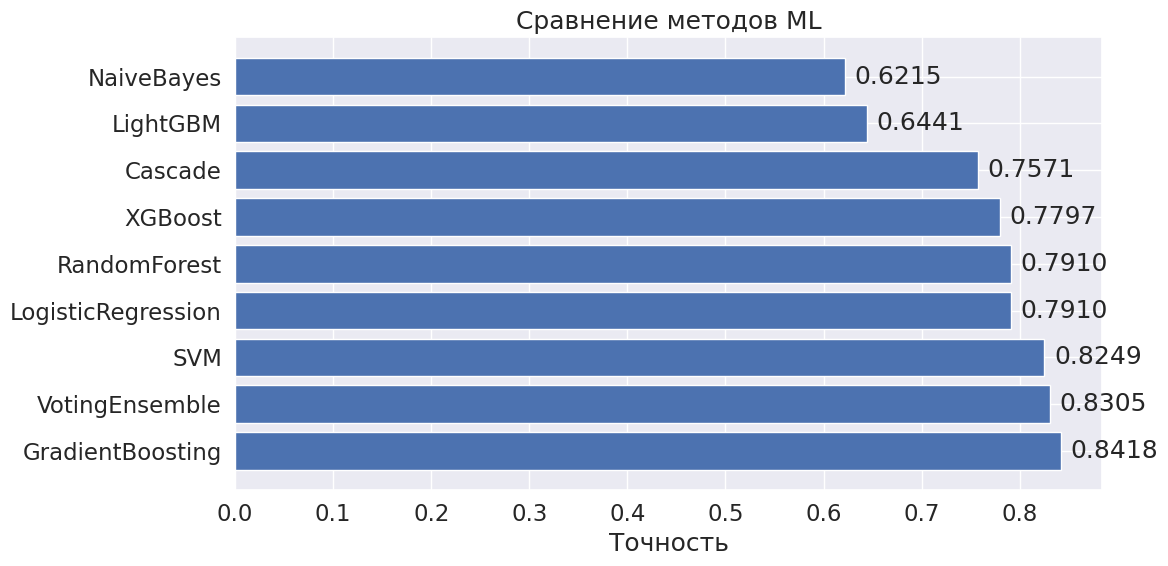


Отчет сохранен: /content/gdrive/My Drive/Colab Notebooks/ml_methods_comparison.xlsx


In [30]:
# ========== ЗАДАЧА 3: ДРУГИЕ МЕТОДЫ ML И КАСКАДЫ ==========

print("\n" + "="*80)
print("ЗАДАЧА 3: Другие методы ML и комбинации")
print("="*80)

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# Подготовка данных
X_train, X_test, y_train, y_test = train_test_split(
    df['text_processed'],
    df['class'],
    random_state=42,
    test_size=0.3,
    stratify=df['class']
)

# Векторизация
tfv = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tf = tfv.fit_transform(X_train)
X_test_tf = tfv.transform(X_test)

print(f"Размерность данных после TF-IDF: {X_train_tf.shape}")

y_train_0based = y_train - 1
y_test_0based = y_test - 1

# 1. Обучение различных ML моделей
print("\n1. Обучение различных ML моделей:")

models = {
    'LogisticRegression': LogisticRegression(C=10.0, random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', probability=True, random_state=42),
    'NaiveBayes': MultinomialNB(),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='mlogloss'),
    'LightGBM': LGBMClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    print(f"  Обучение {name}...")

    if name in ['XGBoost', 'LightGBM']:
        # Используем 0-based метки
        model.fit(X_train_tf, y_train_0based)
        y_pred_0based = model.predict(X_test_tf)
        y_pred = y_pred_0based + 1  # Обратно в 1-based для сравнения
    else:
        # Используем исходные метки
        model.fit(X_train_tf, y_train)
        y_pred = model.predict(X_test_tf)

    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"    {name}: {accuracy:.4f}")

# 2. Ансамбль моделей (Voting)
print("\n2. Создание ансамбля моделей (VotingClassifier):")

# Обучаем XGBoost отдельно с 0-based метками для Voting
xgb_for_voting = XGBClassifier(random_state=42, eval_metric='mlogloss')
xgb_for_voting.fit(X_train_tf, y_train_0based)

voting_clf = VotingClassifier(
    estimators=[
        ('lr', models['LogisticRegression']),
        ('rf', models['RandomForest']),
        ('svm', models['SVM']),
        ('xgb', xgb_for_voting)  # Используем отдельно обученный XGBoost
    ],
    voting='soft'
)

voting_clf.fit(X_train_tf, y_train)
y_pred_voting = voting_clf.predict(X_test_tf)
voting_accuracy = accuracy_score(y_test, y_pred_voting)
results['VotingEnsemble'] = voting_accuracy
print(f"  Voting Ensemble: {voting_accuracy:.4f}")

# 3. Каскадная классификация
print("\n3. Каскадная классификация (двухуровневая):")

# Первый уровень: быстрые модели
first_level_models = {
    'NaiveBayes': MultinomialNB(),
    'LogisticRegression': LogisticRegression(C=10.0, random_state=42)
}

# Обучаем первый уровень
first_level_predictions_train = []
first_level_predictions_test = []

for name, model in first_level_models.items():
    model.fit(X_train_tf, y_train)

    # Получаем вероятности
    train_proba = model.predict_proba(X_train_tf)
    first_level_predictions_train.append(train_proba)

    test_proba = model.predict_proba(X_test_tf)
    first_level_predictions_test.append(test_proba)

# Создаем мета-признаки
X_meta_train = np.hstack(first_level_predictions_train)
X_meta_test = np.hstack(first_level_predictions_test)

print(f"  Размерность мета-признаков: {X_meta_train.shape}")

# Второй уровень: XGBoost с 0-based метками
second_level_model = XGBClassifier(random_state=42, eval_metric='mlogloss')
second_level_model.fit(X_meta_train, y_train_0based)

# Предсказание каскадной модели
y_pred_cascade_0based = second_level_model.predict(X_meta_test)
y_pred_cascade = y_pred_cascade_0based + 1  # Обратно в 1-based
cascade_accuracy = accuracy_score(y_test, y_pred_cascade)
results['Cascade'] = cascade_accuracy
print(f"  Каскадная модель: {cascade_accuracy:.4f}")

# 4. Сводный отчет
print("\n" + "="*60)
print("СВОДНЫЙ ОТЧЕТ ПО МЕТОДАМ ML")
print("="*60)

summary_df = pd.DataFrame({
    'Модель': list(results.keys()),
    'Точность': list(results.values())
}).sort_values('Точность', ascending=False)

print(summary_df.to_string(index=False))

# Визуализация
plt.figure(figsize=(12, 6))
bars = plt.barh(range(len(summary_df)), summary_df['Точность'])
plt.yticks(range(len(summary_df)), summary_df['Модель'])
plt.xlabel('Точность')
plt.title('Сравнение методов ML')

for bar, acc in zip(bars, summary_df['Точность']):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
            f'{acc:.4f}', va='center')

plt.tight_layout()
plt.show()

print(f"\nОтчет сохранен: {gc_path}ml_methods_comparison.xlsx")
summary_df.to_excel(gc_path + 'ml_methods_comparison.xlsx', index=False)